## WUM projekt 1 - aw450252

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import kstest
import statsmodels.api as sm
from scipy.stats import spearmanr
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [40]:
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1xPI9xANkDArbyPYZoQTA22Y2S9OlcUv8

Downloading...
From: https://drive.google.com/uc?id=1xPI9xANkDArbyPYZoQTA22Y2S9OlcUv8
To: /content/dane_projekt1.csv
100% 15.3k/15.3k [00:00<00:00, 23.6MB/s]


# Zadanie 1:

Wczytaj dane, obejrzyj je i podsumuj w dwóch-trzech zdaniach. Zadania pomocnicze:

• Ile jest obserwacji? Przedyskutuj strukturę zbioru danych: ile jest zmiennych ilościowych, a ile jakościowych? Czy występują braki danych? (1pkt)


In [41]:
data = pd.read_csv("dane_projekt1.csv", sep=";", index_col='id').sort_values('id')

# Liczba obserwacji i sprawdzenie typów danych
print(data.info())

# Czy wszystkie wartości to liczby
print("\n\nCzy są nulle:", data.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 1 to 310
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waga          310 non-null    float64
 1   wzrost        310 non-null    float64
 2   plec          310 non-null    int64  
 3   dzieci        310 non-null    int64  
 4   wiek          310 non-null    int64  
 5   dochod        310 non-null    float64
 6   oszczednosci  310 non-null    float64
 7   jednoos       310 non-null    int64  
 8   miejsce       310 non-null    int64  
 9   wydatki_zyw   310 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 26.6 KB
None


Czy są nulle: False


Z wyniku `Index: 310 entries` widać, że jest 310 obserwacji.

Zmiennych jakościowych są trzy: `plec`, `jednoos`, `miejsce`.

Zmiennych ilościowych jest siedem: `waga`, `wzrost`, `dzieci`, `wiek`, `dochod`, `oszczednosci`, `wydatki_zyw`.

Id nie niesie ze sobą żadnych informacji, więc nie traktuję go jako zmiennej.

Widać też, że w żadnej komórce nie ma nulla oraz że zgodnie z oczekiwaniami, każda kolumna ma typ liczbowy.

• Przedstaw i skomentuj zasadne tabele częstości lub statystykę opisową dla zmiennych w zbiorze danych
(zwróć uwagę na typ zmiennych). (1pkt)

In [42]:
# Statystyka opisowa dla zmiennych ilościowych
print("Statystyka opisowa:")
print(data[['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']].describe())

# Ile jest niepoprawnych danych
incorrect_values = data[data['wydatki_zyw'] < 0]['wydatki_zyw'].count()
print("\nUjemne wydatki na żywność: ",  incorrect_values)

# Dane posortowane malejąco po dochodach
print("\nDochody posortowane rosnąco i odpowiadające im wydatki na żywność\n", data[['dochod', 'wydatki_zyw']].sort_values(by='dochod', ascending=False).head(10))

# Usuwanie błędnych wartości
data = data[data['wydatki_zyw'] >= 0]

# Tabele częstości dla zmiennych jakościowych
print("\nTabela częstości dla zmiennej plec:")
print(data['plec'].value_counts())

print("\nTabela częstości dla zmiennej jednoos:")
print(data['jednoos'].value_counts())

print("\nTabela częstości dla zmiennej miejsce:")
print(data['miejsce'].value_counts())

Statystyka opisowa:
             waga      wzrost      dzieci        wiek        dochod  \
count  310.000000  310.000000  310.000000  310.000000    310.000000   
mean    79.814742  172.726774    2.003226   56.241935   1519.658000   
std      3.292902    6.906733    1.352209    6.746653   1293.464325   
min     68.890000  155.670000    0.000000   37.000000    645.270000   
25%     77.430000  167.090000    1.000000   52.000000    966.807500   
50%     79.890000  172.815000    2.000000   56.000000   1190.840000   
75%     82.112500  178.032500    3.000000   61.000000   1620.460000   
max     86.730000  190.790000    5.000000   77.000000  17412.240000   

       oszczednosci   wydatki_zyw  
count    310.000000    310.000000  
mean     945.994839     12.383097  
std      787.601212   3232.382607  
min     -204.240000 -55640.190000  
25%      392.545000    199.757500  
50%      741.190000    249.265000  
75%     1270.222500    283.267500  
max     5485.220000    301.690000  

Ujemne wydatki 

Ze statystyki opisowej dla zmiennych ilościowych widać, że minimalna wartość wydatków na żywność to -55640.19, co jest błędem w danych, bo wartości w tej kolumnie muszą być nieujemne. Korzystając z pandasa, można policzyć, że w kolumnie `wydatki_zyw` jest dokładnie 6 ujemnych wartości: `Ujemne wydatki na żywność: 6`. Sortując dane po dochodach, okazuje się, że błędne dane są powiązane z sześcioma osobami o największych dochodach w całym zbiorze danych. Ponieważ osoby te reprezentują unikalny zbiór, postanowiłem usunąć te rekordy, bo znalezienie zastępczych i poprawnych danych byłoby ciężkie (dalszy opis dotyczy już zmienionych danych).

Widać, że przedział wiekowy osób w próbce to [37, 77] lat.

Moim zdaniem wartości min dla wagi jest dosyć wysoka (68.89 kg), a wartość max jest niska (86.73 kg).

Wszystkie inne statystyki wydają się mieć sensowne wartości.

Z tabel częstości dla zmiennych jakościowych widać, że w próbce są 22 kobiety więcej niż liczba mężczyzn, większość osób mieszka w gospodarstwach wieloosobowych, a miejscowość, w której mieszka badany ma najczęściej od
10 000 do 100 000 mieszkańców.

c) Przedstaw i skomentuj (tam, gdzie zasadne) rozkłady zmiennych, w szczególności porównując je
wizualnie z rozkładem normalnym (np. z wykorzystaniem histogramów, wykresów kwantyl-kwantyl,
etc).

In [43]:
print("Zmienne jakościowe")
columns = ['plec', 'jednoos', 'miejsce']
fig = make_subplots(rows=1, cols=3, subplot_titles=['plec', 'jednoos', 'miejsce'])
for i, column in enumerate(columns, start=1):
    trace = go.Bar(x=data[column].value_counts().sort_index().index.astype(str), y=data[column].value_counts().sort_index().values) # sort_index sortuje po osi x
    fig.add_trace(trace, row=1, col=i)

fig.update_layout(height=400, width=1200, showlegend=False)
fig.show()

Zmienne jakościowe







Zmienne ilościowe


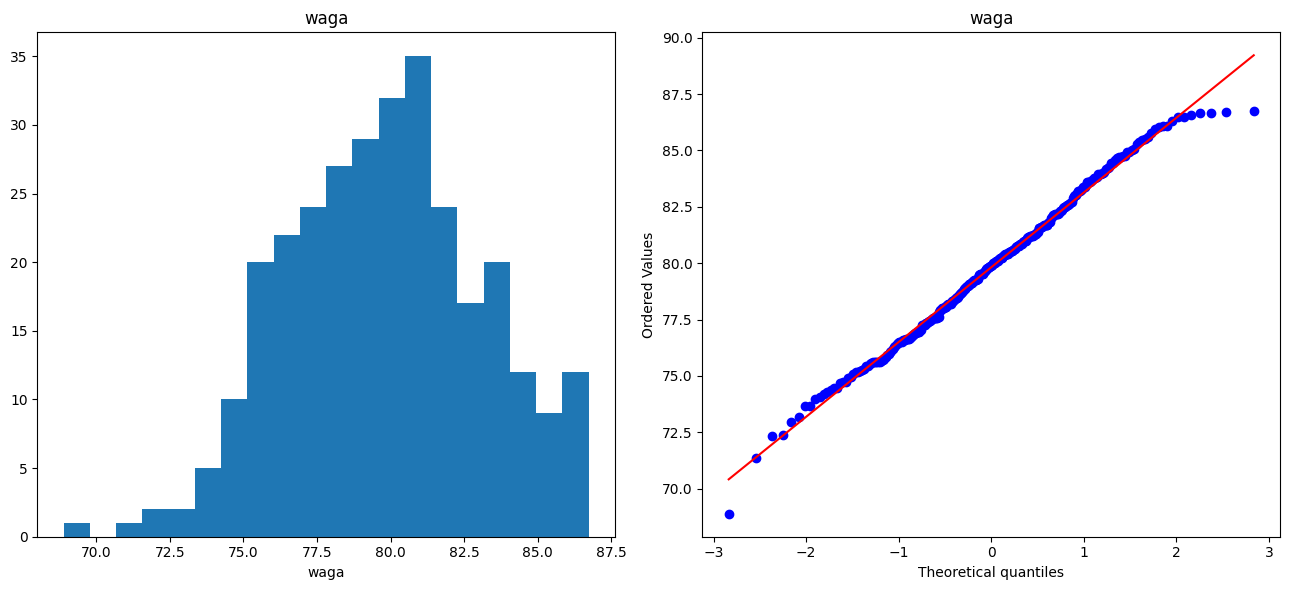

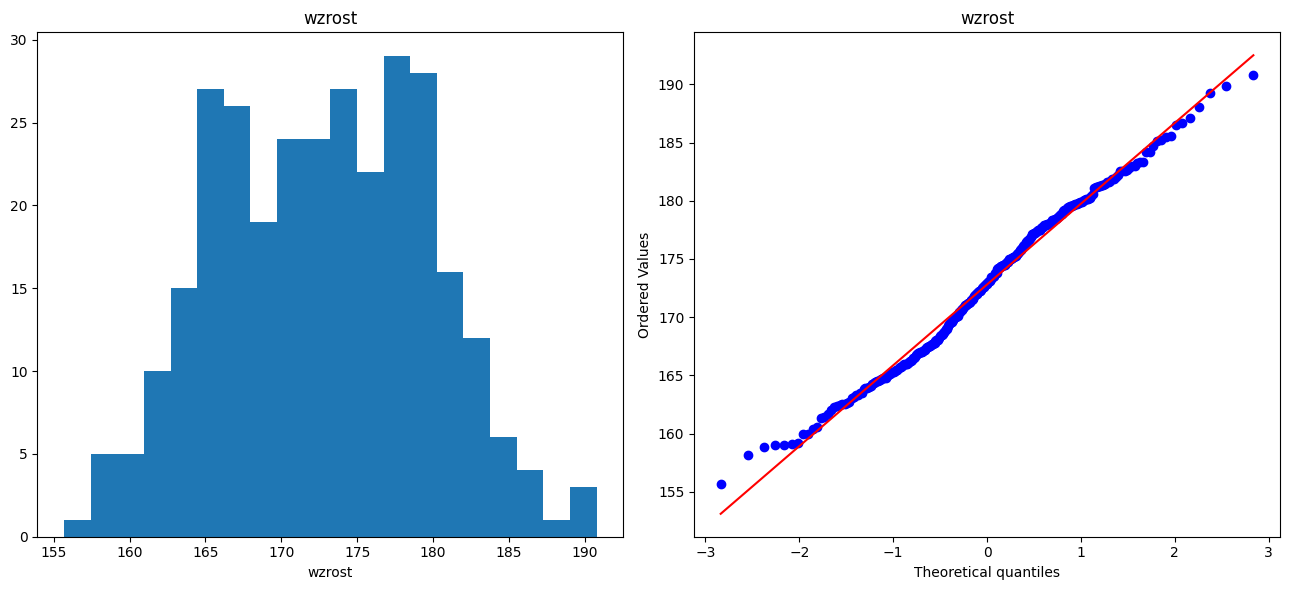

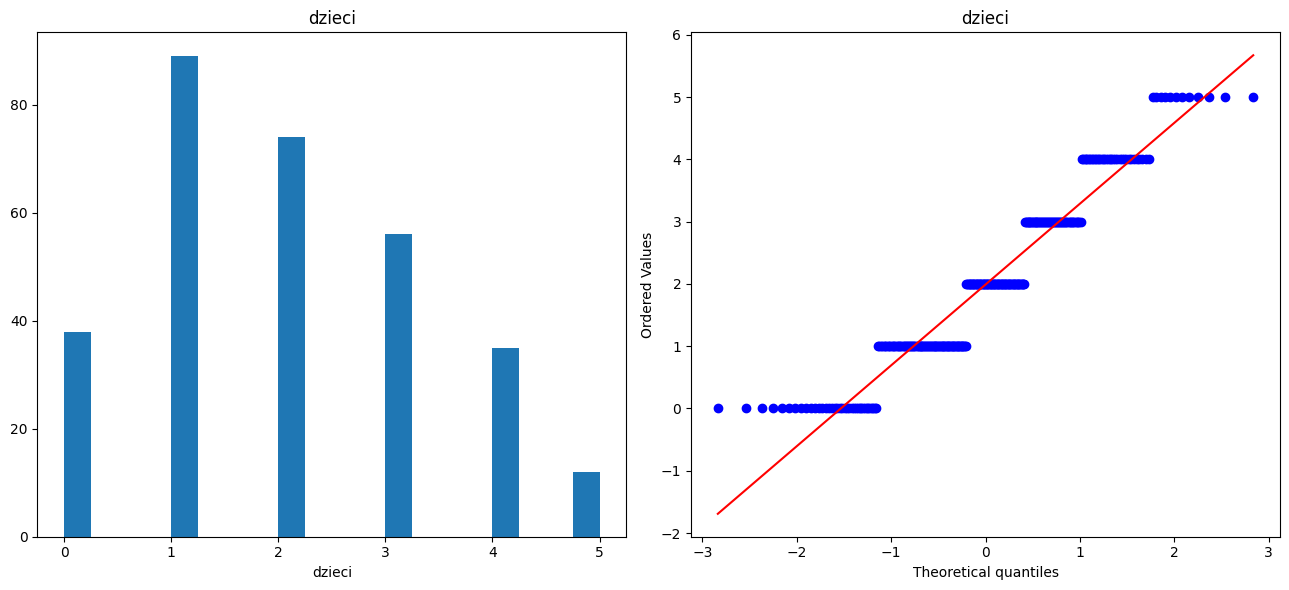

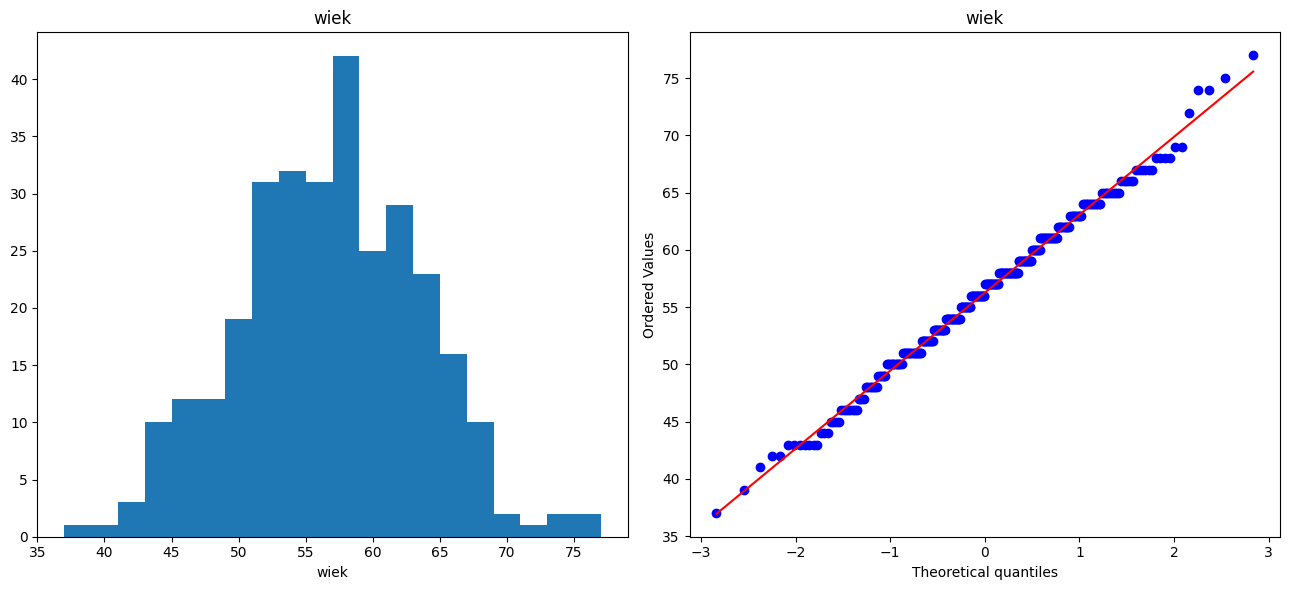

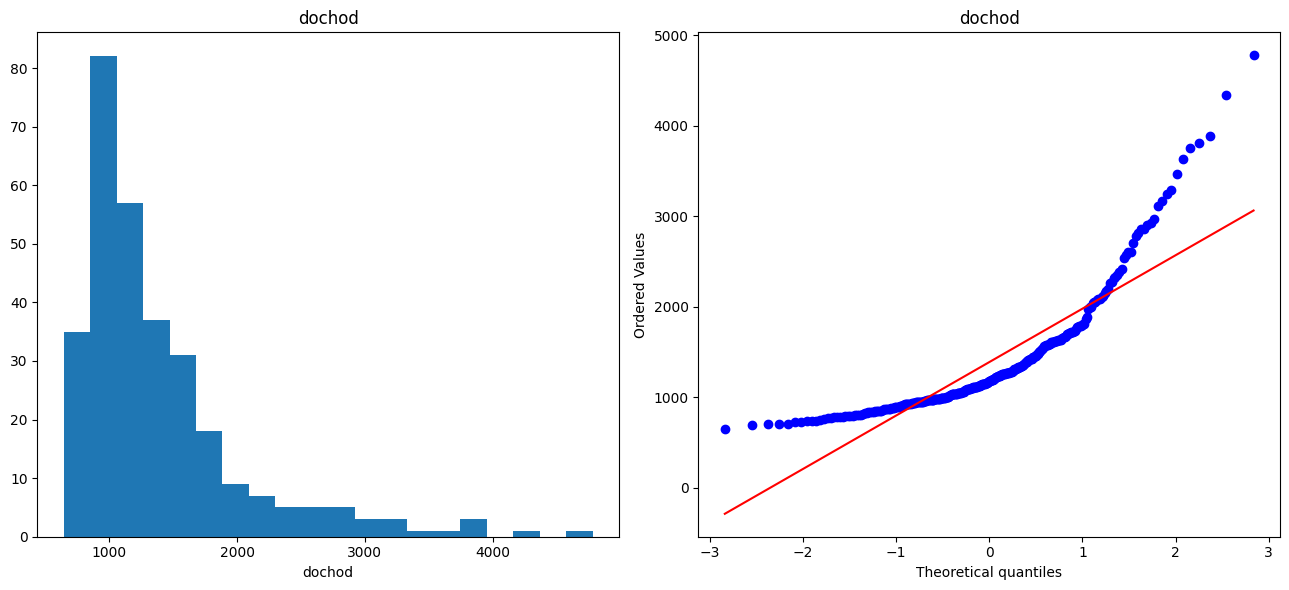

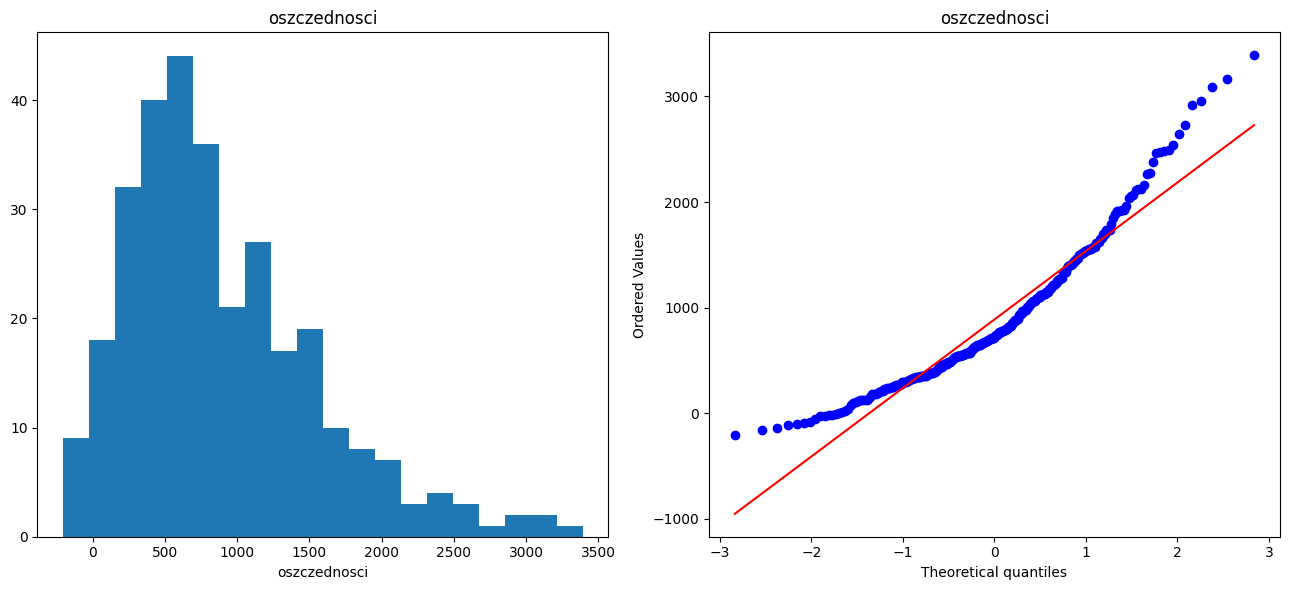

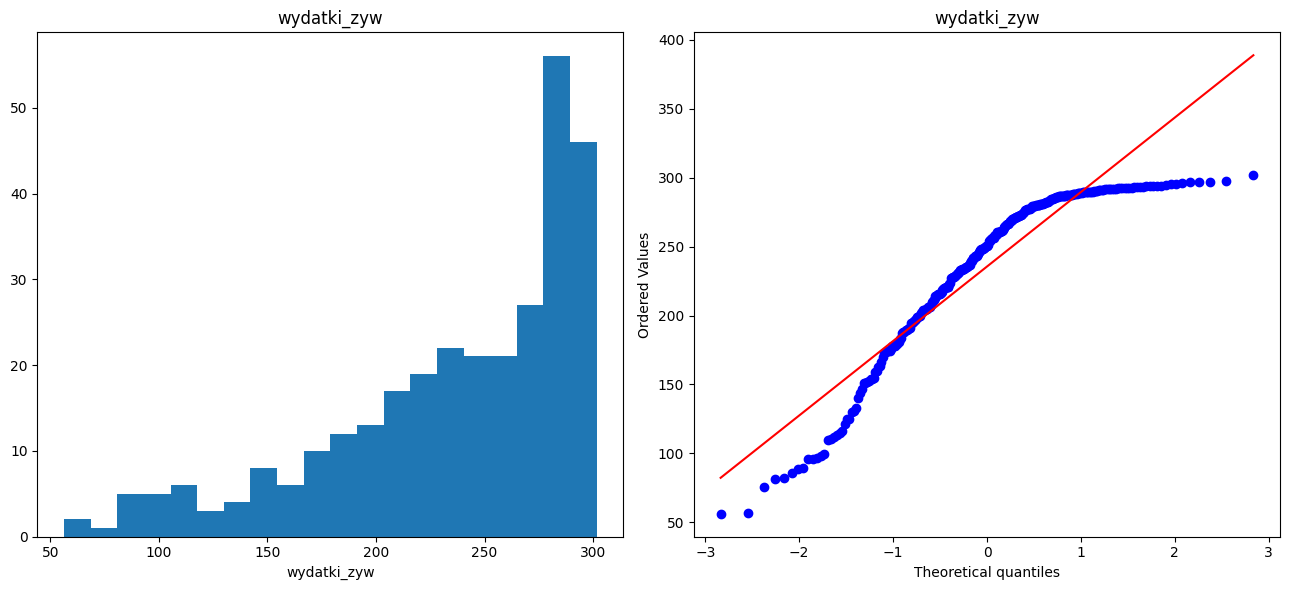

In [44]:


print("\n\n\n\n\nZmienne ilościowe")
for column in ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']:
    plt.figure(figsize=(13, 6))

    plt.subplot(1, 2, 1) # (liczba wierszy, liczba kolumn, pozycja aktualnego wykresu)
    plt.hist(data[column], bins=20)
    plt.title(column)
    plt.xlabel(column)

    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(column)

    plt.tight_layout()
    plt.show()


In [45]:
# Test Shapiro Wilka dla zmiennych ilościowych
for column in ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']:
    shapiro_test = stats.shapiro(data[column])
    print(f"Test shapiro wilka dla {column}: statystyka={shapiro_test[0]}, pvalue={shapiro_test[1]}")

Test shapiro wilka dla waga: statystyka=0.992904007434845, pvalue=0.15905901789665222
Test shapiro wilka dla wzrost: statystyka=0.989259660243988, pvalue=0.02431187406182289
Test shapiro wilka dla dzieci: statystyka=0.9213224649429321, pvalue=1.473041653932139e-11
Test shapiro wilka dla wiek: statystyka=0.9949511289596558, pvalue=0.42118239402770996
Test shapiro wilka dla dochod: statystyka=0.7908120155334473, pvalue=1.8411225807961608e-19
Test shapiro wilka dla oszczednosci: statystyka=0.9290094971656799, pvalue=7.383972600027988e-11
Test shapiro wilka dla wydatki_zyw: statystyka=0.8780760169029236, pvalue=8.07167256888482e-15


Hipotezą zerową dla testu Shapiro Wilka jest, że próbka pochodzi z rozkładu normalnego.
Dla poziomu istotności $\alpha=1 \%$ odrzucamy hipotezę zerową dla liczby dzieci, dochodu, oszczędności i wydatków na żywność, czyli stwierdzamy, że dane te nie pochodzą z rozkładu normalnego.

W przypadku wzrostu, wagi i wieku nie mamy wystarczającego powodu, żeby potwierdzić lub odrzucić hipotezę zerową.

Mimo że nie udało się potwierdzić, że wzrost, waga i wiek mają rozkład normalny, to w dalszej części raportu przyjmuję, że tak jest.
Swoją decyzję opieram na histogramach i QQplotach, na których widać, że dane mają rozkład przynajmniej zbliżony do normalnego.

Z histogramów i QQplotów widać też, że liczba dzieci, dochód, oszczędności i wydatki na żywność rzeczywiście nie mają rozkładu normalnego.


Wnioski z wykresów dla zmiennych jakościowych są takie same jak z tabel częstości w poprzednim podpunkcie.

# Zadanie 2:
Sprawdź, czy występują pomiędzy zmiennymi zależności. Policz i zaprezentuj na wykresie typu
mapa ciepła (heatmap) zasadny współczynnik korelacji pomiędzy zmiennymi ilościowymi, a także zbadaj
zależność zmiennych jakościowych. Skomentuj wyniki ze szczególnym uwzględnieniem kwestii istotności
statystycznej. (3pkt)

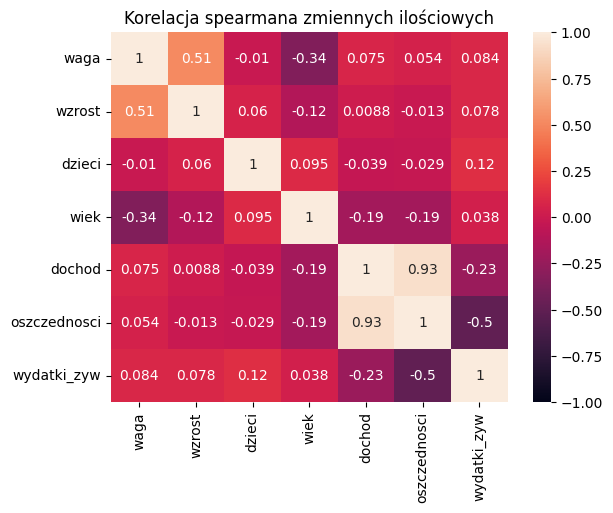

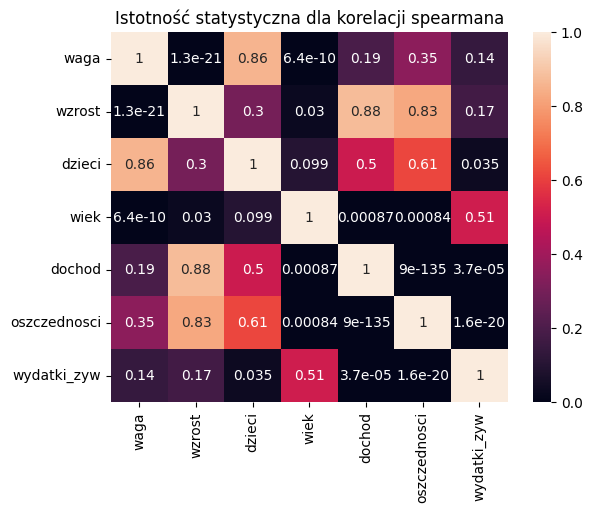

In [46]:
# Zmienne ilościowe
columns = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']

ax = plt.axes()
sns.heatmap(data[columns].corr(method='spearman'), annot=True, vmin=-1, vmax=1, ax=ax)
ax.set_title("Korelacja spearmana zmiennych ilościowych")
plt.show()

ax = plt.axes()
sns.heatmap(data[columns].corr(method=lambda x, y: spearmanr(x, y)[1]), annot=True, vmin=0, vmax=1, ax=ax)
ax.set_title("Istotność statystyczna dla korelacji spearmana")
plt.show()

Liczę współczynnik korelacji Spearmana, ponieważ jest to test nieparametryczny, więc nie wymaga założeń odnośnie do rozkładu populacji. Różni się on od testu Pearsona, który wymaga założenia o normalnym rozkładzie obu porównywanych zmiennych, a wiemy, że zmienne nie zawsze mają taki rozkład.

Hipoteza zerowa mówi, że nie istnieje związek (pod względem monotoniczności) pomiędzy zmiennymi.

Dla $\alpha=1 \%$ możemy odrzucić tę hipotezę (czyli założyć, że zmienne są zależne) dla relacji:
1. wzrost - waga (wsp. korelacji 0.51)
2. wiek - waga (wsp. korelacji -0.34)
3. dochód - wiek (wsp. korelacji -0.19)
4. oszczędnosci - wiek (wsp. korelacji -0.19)
5. oszczędności - dochód (wsp. korelacji 0.93)
6. wydatki_zyw - dochód (wsp. korelacji -0.23)
7. wydatki_zyw - oszczędności (wsp. korelacji -0.5)

Widoczne są także inne, wydawałoby się sensowe zależności (np. wydatki_zyw - dzieci), ale prawdopodobieństwo zaobserwowanej wartości korelacji, przy założeniu, że żadnej korelacji nie ma, jest większe niż przyjęte $\alpha=1 \%$.

In [47]:
# Zmienne jakościowe
print("Korelacja zmiennych jakościowych")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['plec'], data['dzieci']))
print(f"Test korelacji dla 'plec' i 'dzieci': chi2 = {chi2}, pvalue = {p}")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['plec'], data['jednoos']))
print(f"Test korelacji dla 'plec' i 'jednoos': chi2 = {chi2}, pvalue = {p}")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['plec'], data['miejsce']))
print(f"Test korelacji dla 'plec' i 'miejsce': chi2 = {chi2}, pvalue = {p}")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['dzieci'], data['jednoos']))
print(f"Test korelacji dla 'dzieci' i 'jednoos': chi2 = {chi2}, pvalue = {p}")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['dzieci'], data['miejsce']))
print(f"Test korelacji dla 'dzieci' i 'miejsce': chi2 = {chi2}, pvalue = {p}")

chi2, p, _, _ = chi2_contingency(pd.crosstab(data['jednoos'], data['miejsce']))
print(f"Test korelacji dla 'jednoos' i 'miejsce': chi2 = {chi2}, pvalue = {p}")


Korelacja zmiennych jakościowych
Test korelacji dla 'plec' i 'dzieci': chi2 = 8.306640596554928, pvalue = 0.14012617776841182
Test korelacji dla 'plec' i 'jednoos': chi2 = 0.13841187645610253, pvalue = 0.7098649541109077
Test korelacji dla 'plec' i 'miejsce': chi2 = 2.9973658607422933, pvalue = 0.22342423171950018
Test korelacji dla 'dzieci' i 'jednoos': chi2 = 4.1322075677916414, pvalue = 0.5305427169280823
Test korelacji dla 'dzieci' i 'miejsce': chi2 = 7.0968553456261, pvalue = 0.7162706762970519
Test korelacji dla 'jednoos' i 'miejsce': chi2 = 0.5238551616221235, pvalue = 0.7695667530897057


Hipoteza zerowa dla testu chi-kwadrat mówi, że nie ma związku między zmiennymi.

Dla poziomu istotności $ \alpha=1 \% $ nie możemy odrzucić tej hipotezy nawet raz, co **nie** oznacza, że ją potwierdzamy i zmienne rzeczywiście są niezależne.


# Zadanie 3:
Podsumuj dane przynajmniej trzema różnymi wykresami (skomentuj każdy z wykresów). Podstawowy zestaw wykresów zawiera:

• Wykresy rozrzutu (scatter-plot) dla wszystkich zmiennych ilościowych względem zmiennej wydatki_zyw.

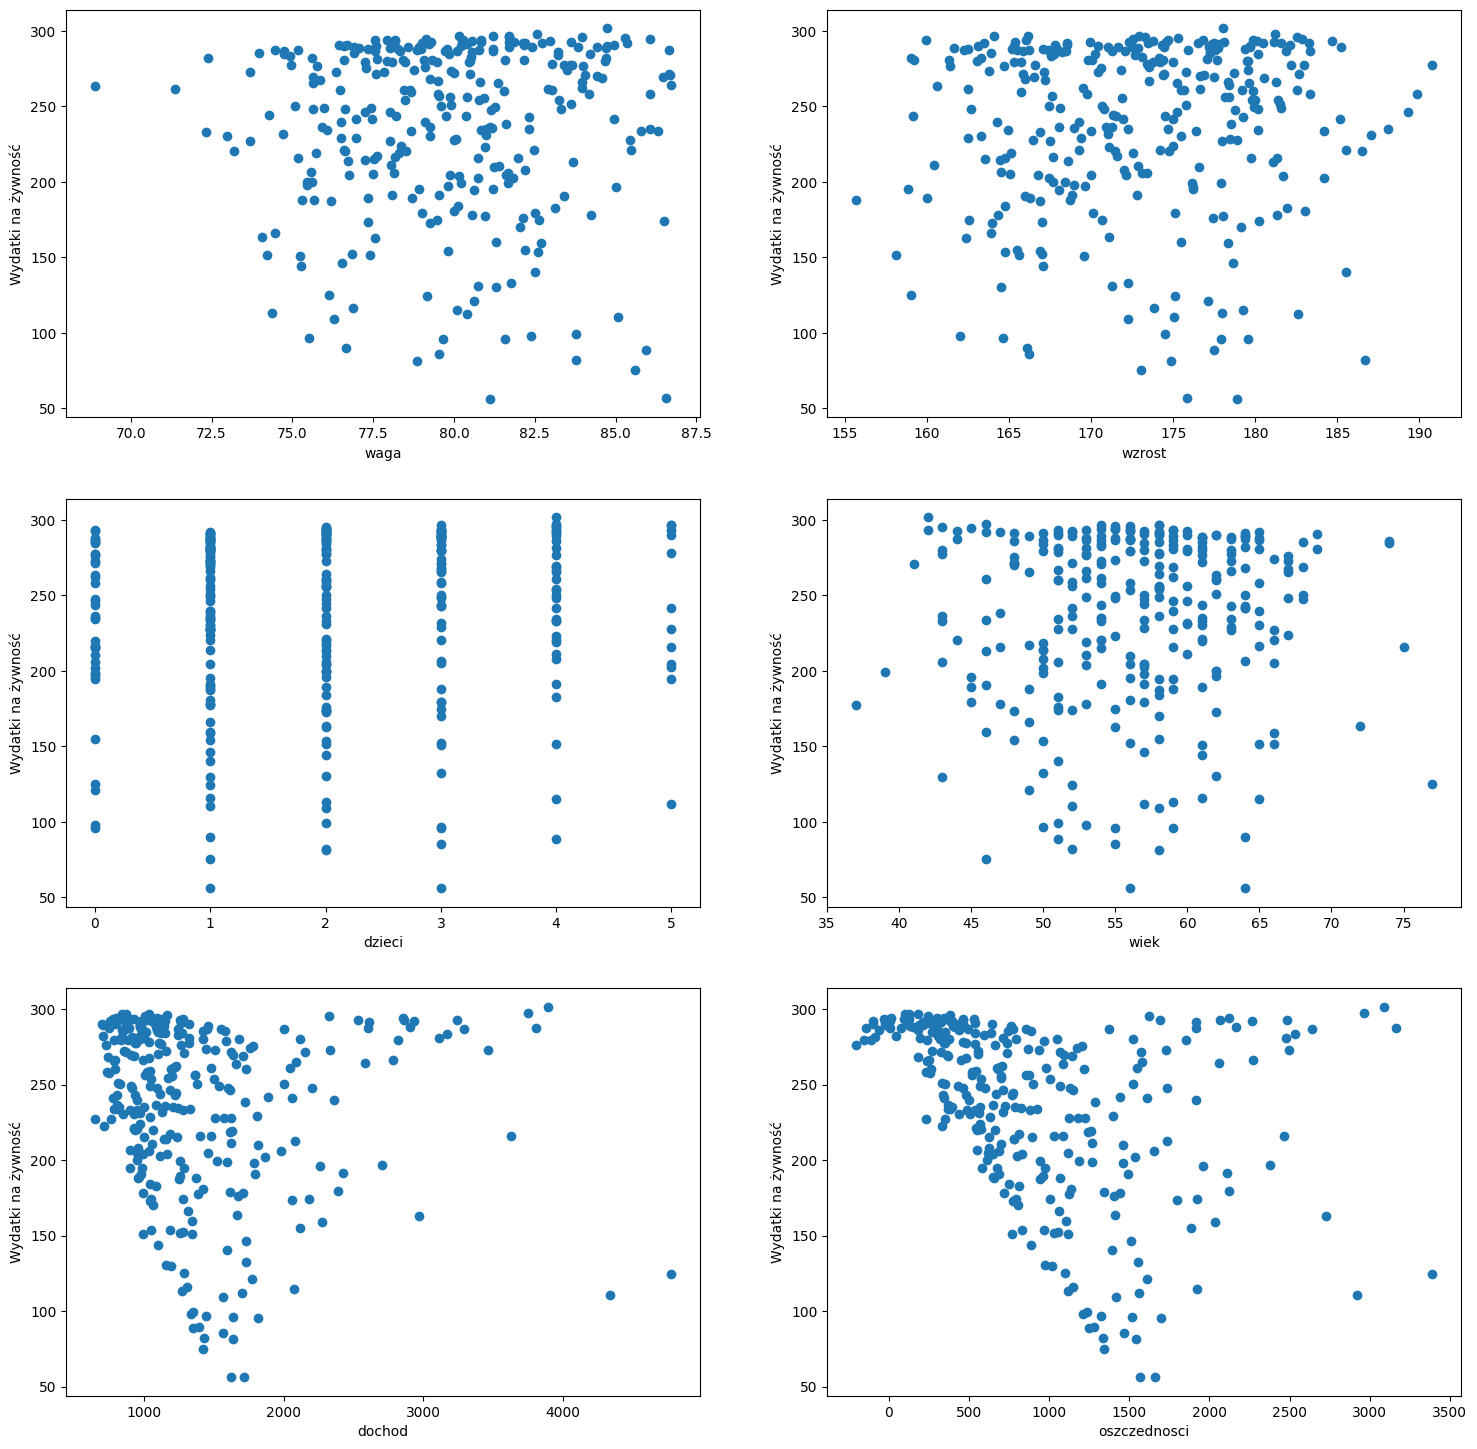

In [48]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci']):
    plt.subplot(3, 2, i + 1) # (liczba wierszy, liczba kolumn, aktualna pozycja), +1, bo ma zaczynać się od 1
    plt.scatter(y=data['wydatki_zyw'], x=data[col])
    plt.ylabel('Wydatki na żywność')
    plt.xlabel(col)

plt.show()

1. Wydatki na żywność a waga.

    Nie widać zależności między wydatkami na żywność i wagą. Innymi słowy, waga nie zmienia się w zależności od wydatków na żywność.


2. Wydatki na żywność a wzrost.

    Podobnie jak w przypadku wagi, punkty rozłożone są równomiernie, co wskazuje na brak korelacji.


3. Wydatki na żywność a dzieci.

    Ponownie brak korelacji. Wykres wygląda bardziej specyficznie ze względu na mały zbiór wartości.
   

4. Wydatki na żywność a wiek.

    Brak widocznej korelacji.
   

5. Wydatki na żywność a dochód.

    Można zauważyć ujemną korelację pomiędzy zmiennymi (im większy dochód, tym mniejsze wydatki na żywność). Do tego samego wniosku doszliśmy w poprzednim zadaniu, gdzie współczynnik korelacji wyniósł -0.23.
   

6. Wydatki na żywność a oszczędności

    Wyraźnie widać ujemną korelację pomiędzy zmiennymi. Wraz ze wzrostem oszczędności maleją wydatki na żywność.
    W poprzednim zadaniu dostaliśmy współczynnik korelacji równy -0.5.


• Wykresy typu pudełkowy (boxplot) dla jednej wybranej zmiennej ilościowej w podziale na miejsce
zamieszkania respondentów.

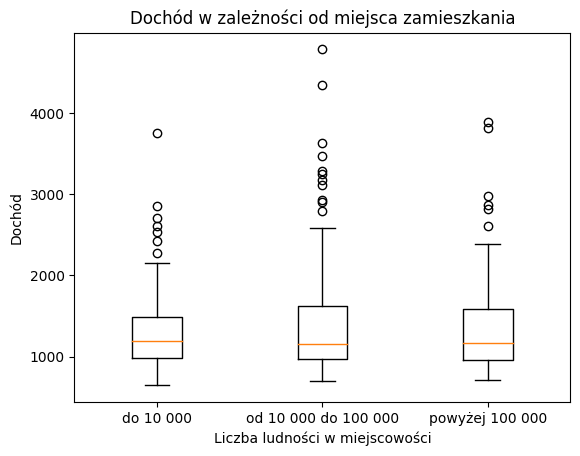

In [49]:
data_1 = data[data['miejsce'] == 1]['dochod']
data_2 = data[data['miejsce'] == 2]['dochod']
data_3 = data[data['miejsce'] == 3]['dochod']
data_plot = [data_1, data_2, data_3]

plt.boxplot(data_plot, labels=['do 10 000', 'od 10 000 do 100 000', 'powyżej 100 000'])
plt.title('Dochód w zależności od miejsca zamieszkania')
plt.xlabel('Liczba ludności w miejscowości')
plt.ylabel('Dochód')
plt.show()

Widać, że w każdym z trzech przypadków dochody uboższej połowy badanych zawierają się w znacznie węższym przedziale niż dochody bogatszej połowy.

Atrybuty boxplota (min, q1, q2, q3, max) są niemal takie same, co oznacza, że zarobki w zależności od rozmiaru miejscowości nie różnią się znacząco. Liczba wartości odstających również wydaje się zbliżona.


• Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.

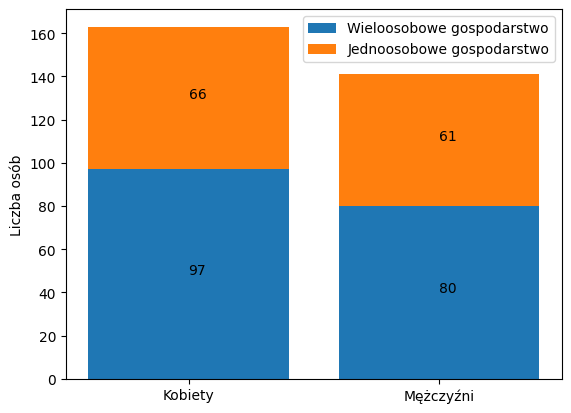

In [50]:
counter0 = data[data['jednoos'] == 0]['plec'].value_counts()
counter1 = data[data['jednoos'] == 1]['plec'].value_counts()
labels = ['Kobiety', 'Mężczyźni']

bar1 = plt.bar(labels, counter0, label='Wieloosobowe gospodarstwo')
bar2 = plt.bar(labels, counter1, bottom=counter0, label='Jednoosobowe gospodarstwo')

# Dodawanie wartości na środku słupka
for bars in (bar1, bar2):
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height() / 2, bar.get_height())

plt.ylabel('Liczba osób')
plt.legend()

plt.show()

Niezależnie od płci, więcej osób mieszka z kimś niż samotnie. Dla kobiet jest to 59.5%, dla mężczyzn 56.7%.

Jak już ustaliliśmy w zadaniu pierwszym, w próbce jest więce kobiet.

##### Inne wykresy

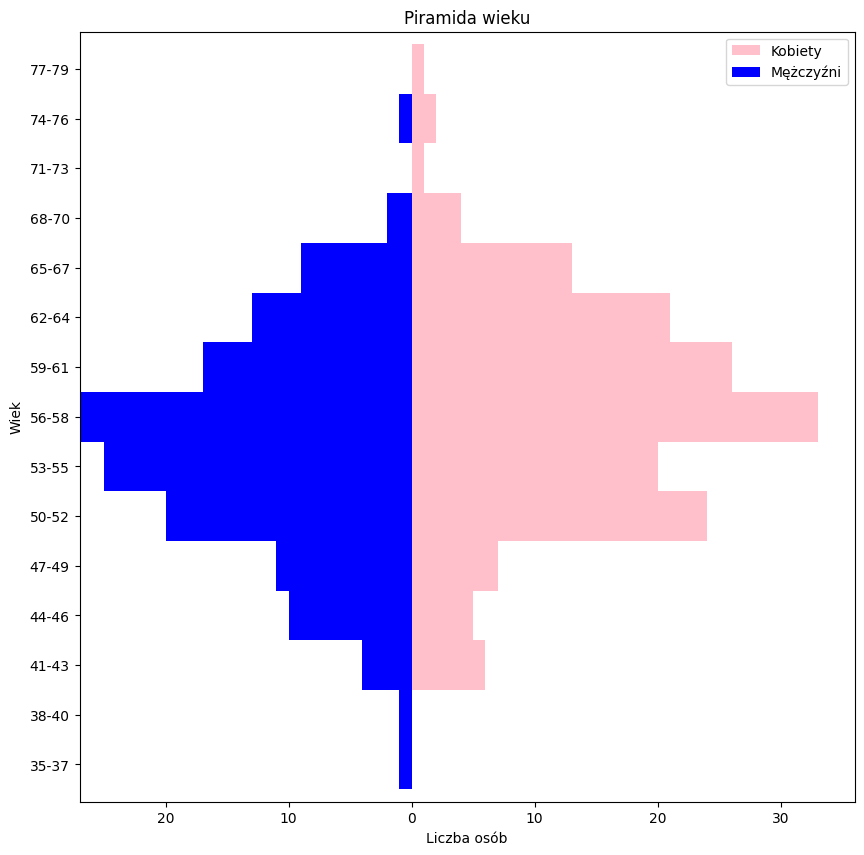

In [51]:
data_copy = data.copy()

# tworzenie przedziałów wiekowych
bins = [i for i in range(1, 101, 3)]
labels = [f'{i+1}-{i+3}' for i in range(1, 98, 3)]


# podzielenie osób na grupy wiekowe
data_copy['age_group'] = pd.cut(data_copy['wiek'], bins=bins, labels=labels)

# zliczenie osób w każdej grupie wiekowej z podziałem na płeć
age_groups = data_copy.groupby(['age_group', 'plec'], observed=True).size().unstack(fill_value=0) # mam dwa indeksy, więc dataframe ma dwa poziomy indeksów (age_group, plec), unstack() zamienia to na tabelę dwuwymiarową wiek x plec

_, axes = plt.subplots(figsize=(10, 10))
age_groups[1].plot(kind='barh', color='pink', label='Kobiety', width=1)
age_groups[2].plot(kind='barh', left=-age_groups[2], color='blue', label='Mężczyźni', width=1)

# Zmiana etykiet, żeby na osi x były same dodatnie (np. 5 zamiast -5)
def function(x, pos):
    return f'{int(abs(x))}'
axes.xaxis.set_major_formatter(FuncFormatter(function))

axes.set_xlabel('Liczba osób')
axes.set_ylabel("Wiek")
axes.legend()
plt.title("Piramida wieku")
plt.show()


Na wykresie widać, że w próbce jest więcej młodszych mężczyzn (wiek 35-49 lat), niż kobiet.
Natomiast liczba kobiet powyżej 55 roku życia przewyższa liczbę mężczyzn w tym wieku.

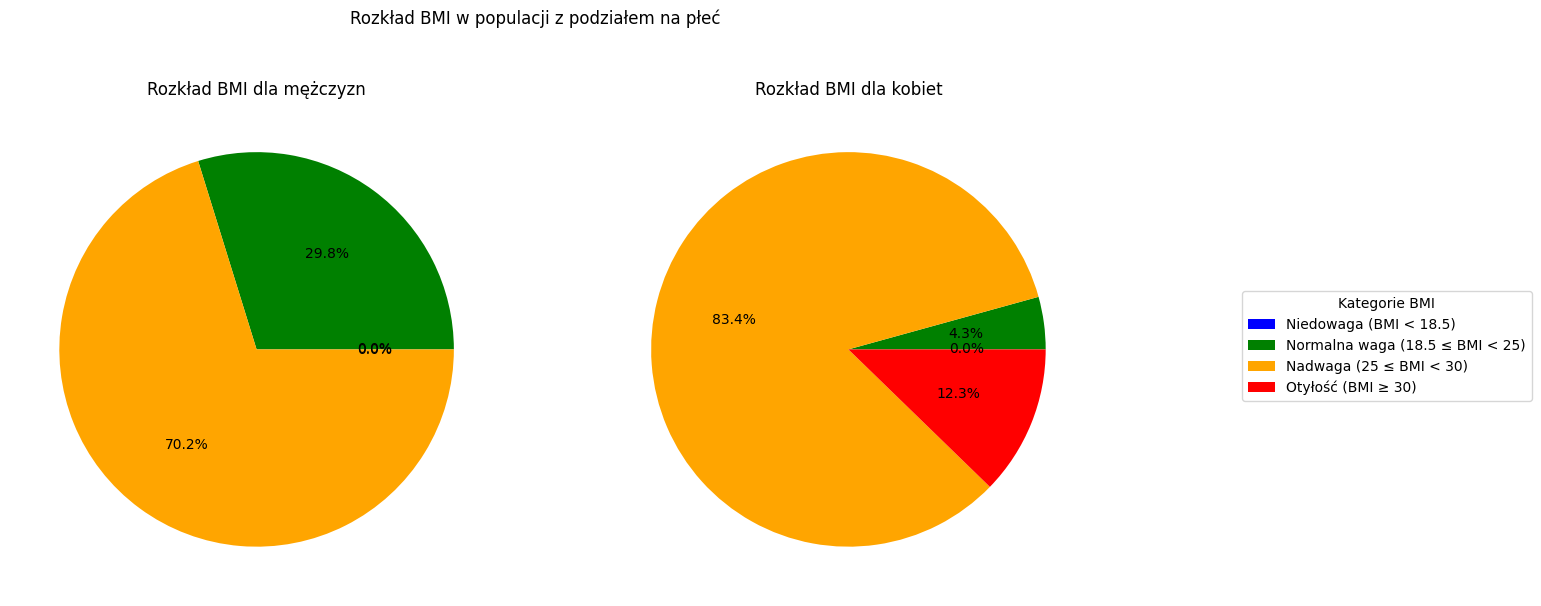

In [52]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Niedowaga', 'Normalna waga', 'Nadwaga', 'Otyłość']
labels_with_ranges = [
    'Niedowaga (BMI < 18.5)',
    'Normalna waga (18.5 ≤ BMI < 25)',
    'Nadwaga (25 ≤ BMI < 30)',
    'Otyłość (BMI ≥ 30)'
]

colors = ['blue', 'green', 'orange', 'red']

data_copy = data.copy()
data_copy['BMI_Category'] = pd.cut(data['waga'] / ((data['wzrost'] / 100) ** 2), bins=bins, labels=labels)

bmi_counts_men = data_copy[data_copy['plec'] == 2]['BMI_Category'].value_counts(sort=False).reindex(labels)
bmi_counts_women = data_copy[data_copy['plec'] == 1]['BMI_Category'].value_counts(sort=False).reindex(labels)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

w, _, _ = axs[0].pie(bmi_counts_men, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Rozkład BMI dla mężczyzn')

axs[1].pie(bmi_counts_women, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Rozkład BMI dla kobiet')

fig.legend(w, labels_with_ranges, title="Kategorie BMI", loc="center left", bbox_to_anchor=(1, 0.5))

plt.suptitle('Rozkład BMI w populacji z podziałem na płeć')
plt.show()

Z wykresów kołowych widać, że aż 70.2% mężczyzn ma nadwagę, a waga pozostałych 29.8% jest w normie. Żaden mężczyzna nie ma niedowagi ani nie jest otyły.

W przypadku kobiet sytuacja jest gorsza, bo 83.4% ma nadwagę, 12.3% jest otyłe, a zaledwie 4.3% ma odpowiednią wagę. Żadna kobieta nie ma niedowagi.

Źródło kategorii BMI dla osób powyżej 20 roku życia: [link](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

(3pkt, każdy wykres z podstawowego zestawu wart 1pkt: 0,25 pkt za sam wykres, 0,75pkt za komentarz
w kontekście analizy eksploracyjnej. Mile widziane dodatkowe wykresy wg własnej inwencji uzupełniające
analizę eksploracyjną, np. słupkowe, liniowe, kołowe... – możliwe dodanie do 1 dodatkowego punktu przez
osobę sprawdzającą za interesujące dodatkowe wizualizacje)

# Zadanie 4:
Policz dwustronne przedziały ufności na poziomie ufności 1 − α = 0.99 dla zmiennej wiek dla
następujących parametrów rozkładu:

• średnia i odchylenie standardowe;

• kwartyle 1, 2 i 3.

Podaj wykorzystane założenia i skomentuj, czy wydają Ci się one uprawnione (2pkt: 0,25pkt za średnią,
0,25pkt za wariancję, 0,75pkt za kwartyle, 0,75pkt za podanie i komentarz do przyjętych założeń)

In [53]:
alpha = 0.01

# dla średniej
res = stats.t.interval(1-alpha, len(data['wiek'])-1, loc=np.mean(data['wiek']), scale=stats.sem(data['wiek']))
print("Przedział ufności dla średniej wieku:", res)

# dla odchylenia standardowego
from scipy.stats import chi2
n = len(data['wiek'])
lower_limit = np.std(data['wiek']) * np.sqrt((n - 1)/ chi2.ppf(1-(alpha/2), n-1) )
upper_limit = np.std(data['wiek']) * np.sqrt((n - 1)/ chi2.ppf((alpha/2), n-1) )
print("Przedział ufności dla odchylenia standardowego:", (lower_limit, upper_limit))

# dla kwartyli
n_samples = 200
for q in [1, 2, 3]:
    medians = []
    for i in range(n_samples):
        sample = data['wiek'].sample(n=n_samples, replace=True) # replace oznacza zwracanie
        medians.append(np.quantile(sample, q * 0.25))

    medians.sort()

    lower_bound = medians[int(0.01 * len(medians)) - 1]
    upper_bound = medians[int(0.99 * len(medians)) - 1]

    print(f"przedział ufności dla {q} kwantyla: ({lower_bound}, {upper_bound})")

Przedział ufności dla średniej wieku: (55.25152156054645, 57.26821528155881)
Przedział ufności dla odchylenia standardowego: (6.1262937686646035, 7.555749637380257)
przedział ufności dla 1 kwantyla: (50.0, 53.0)
przedział ufności dla 2 kwantyla: (55.0, 58.0)
przedział ufności dla 3 kwantyla: (59.0, 63.0)


Przedział ufności dla średniej policzyłem za pomocą `stats.t.interval`.

Przedział dla odchylenia standardowego znalazłem za pomocą wzorów:

$$ \text{dolna granica} = sd \cdot \sqrt{\frac{n-1}{\chi^2_{1-\frac{\alpha}{2}, n-1}}} $$

$$ \text{górna granica}= sd \cdot \sqrt{\frac{n-1}{\chi^2_{\frac{\alpha}{2}, n-1}}} $$

gdzie:
- $ sd $ to estymator odchylenia standardowego próbki
- $ \chi^2_{p, df} $ to kwantyl rzędu $ p $ rozkładu chi-kwadrat z $ df $ stopniami swobody.


natomiast przedziały ufności dla kwartyli policzyłem za pomocą bootstrappingu.

**Założenia:**

Funkcja `stats.t.interval` oraz wzór na przedział ufności dla odchylenia standardowego korzystają z założenia, że wiek był próbkowany niezależnie z rozkładu normalnego.
W zadaniu pierwszym sprawdziliśmy, że wiek pochodzi z rozkładu normalnego, więc to założenie jest spełnione.

Kolejnym założeniem we wszystkich trzech przypadkach jest, że badana próbka jest reprezentatywna,
o którym wiadomo, że jest spełnione z polecenia zadania.

Bootstrapping nie ma żadnych innych założeń, w szczególności nie trzeba znać rozkładu badanej zmiennej.

# Zadanie 5:

Socjologowie bajtoccy dzielą społeczeństwo Bajtocji według czterech klas zamożności:

• klasa niższa (osiągany dochód poniżej 25 centylu rozkładu dochodów)

• klasa średnia (osiągany dochód równy lub wyższy 25 centylowi i niższy niż 75 centyl rozkładu dochodów)

• klasa wyższa średnia (osiągany dochód równy lub wyższy 75 centylowi i niższy niż 90 centyl rozkładu
dochodów)

• klasa wyższa (osiągany dochód równy lub wyższy 90 centylowi rozkładu dochodów)

Przedyskutuj i porównaj zróżnicowanie wydatków na żywność w wyżej wymienionych klasach zamożności
(2pkt: 0,5pkt za przeprowadzenie podziału, 1pkt za obliczenie właściwej miary zróżnicowania, 0,5pkt. za
komentarz i dyskusję wyników).


Wydatki na żywność: 
                       count        mean        std         cv
dochod                                                       
klasa niższa             76  258.610132  31.333049  12.035966
klasa średnia           152  231.226645  59.344931  25.580700
klasa wyższa średnia     45  201.490444  65.869815  32.326007
klasa wyższa             31  249.862581  56.083263  22.080649


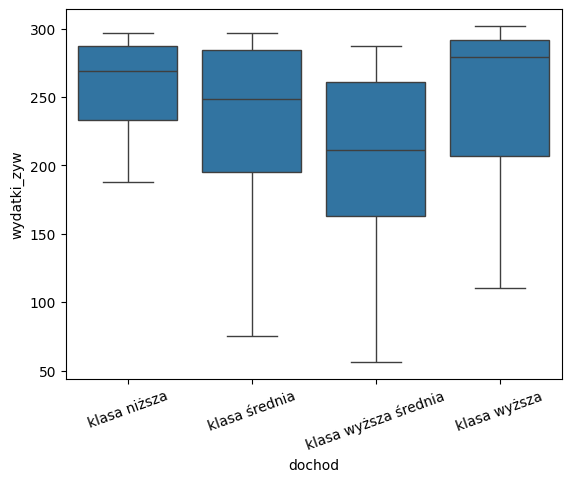

In [54]:
quantiles = data['dochod'].quantile([0.25, 0.75, 0.90])

splitted_data = pd.cut(data['dochod'],
           bins=[-np.inf, quantiles[0.25], quantiles[0.75], quantiles[0.90], np.inf],
           labels=['klasa niższa', 'klasa średnia', 'klasa wyższa średnia', 'klasa wyższa'])

res = data.groupby(splitted_data, observed=True).agg( # observed=True, pozostawia tylko te klasy, dla których istnieją dane i ucisza Future Warning
    count=('wydatki_zyw', 'count'),
    mean=('wydatki_zyw', 'mean'),
    std=('wydatki_zyw', 'std'),
    cv=('wydatki_zyw', lambda x: np.std(x) / np.mean(x) * 100)
)

print("\nWydatki na żywność: \n", res)

# Wykres pudełkowy
sns.boxplot(x=splitted_data, y=data['wydatki_zyw'])
plt.xticks(rotation=20)
plt.show()

Powyższy wykres nie wygląda tak, jak można by się spodziewać.
Widać na nim, że najmniej na żywność wydaje klasa *wyższa średnia*, po której jest *klasa średnia*.
Dziwi też, że *klasa niższa* wydaje często tyle samo, lub nawet więcej niż *klasa wyższa* i w ogólności wydaje najwięcej spośród wszystkich klas.

Można podejrzewać, że wysokie wydatki *klasy niższej* są spowodowane liczbą dzieci, lub statusem gospodarstwa domowego.

Dodatkowo, ze statystyki coefficient of variation (Współczynnik zmienności) widać, że wydatki *klasy wyższej średniej* mogą procentowo najbardziej odbiegać od swojej średniej. Następne są *klasa średnia*, *klasa wyższa* i na koniec *klasa niższa*.

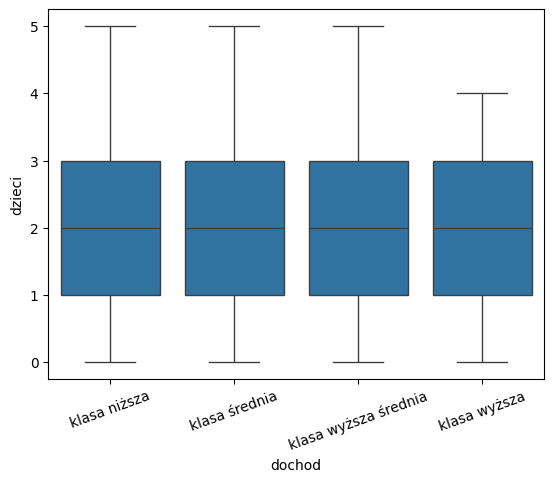

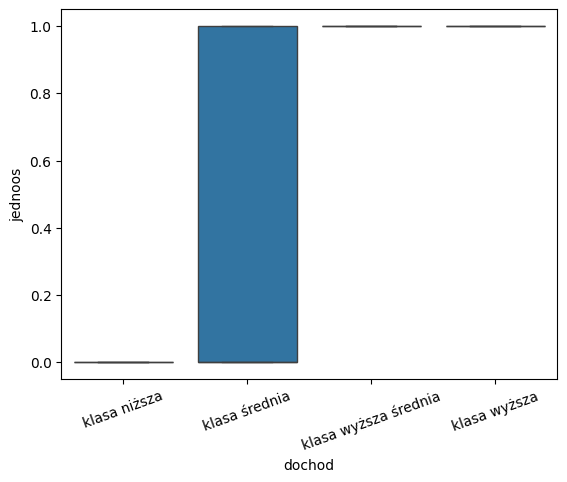

In [55]:
sns.boxplot(data, x=splitted_data, y='dzieci')
plt.xticks(rotation=20)
plt.show()

sns.boxplot(data, x=splitted_data, y='jednoos')
plt.xticks(rotation=20)
plt.show()

Rzeczywiście, o ile liczba dzieci nie mówi nam dużo, bo jedynie klasa wyższa ma ich czasami trochę mniej w porównaniu do innych klas,
to okazuje się, że osoby z klasy niższej zawsze mieszkają w gospodarstwach wieloosobowych, a osoby z klas wyższej średniej i wyższej zawsze mieszkają same.

Patrząc na wszystkie dane, nie jest łatwo wytłumaczyć dlaczego osoby z klasy wyższej wydają na żywność mniej niż osoby z klasy niższej.
Możliwą przyczyną jest to, że osoby z klasy wyższej mają na utrzymaniu dzieci, ale nigdy z nimi nie mieszkają, co może sugerować, że pokrywają jedynie część wydatków swoich dzieci (np. opłaty za pokój w akademiku, ale już nie za żywność).

# Zadanie 6:
Odpowiedz na następujące pytania badawcze, przeprowadzając najlepiej nadające się do tego
testy statystyczne na poziomie istotności α = 0, 01:

• Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni?

In [56]:
savings_women= data[data['plec']==1]['oszczednosci'].apply(lambda x: np.sqrt(x + 205))
savings_men = data[data['plec']==2]['oszczednosci'].apply(lambda x: np.sqrt(x + 205))
t, p = ttest_ind(savings_women, savings_men, alternative='greater', equal_var=True)
print(f"test tstudent: t statystyka {t}, pvalue {p}")

print(stats.shapiro(savings_women))
print(stats.shapiro(savings_men))

s, p = levene(savings_women, savings_men)
print(f"test levene: statystyka {s}, p-wartość {p}")

test tstudent: t statystyka 0.13226885854217071, pvalue 0.4474298595118329
ShapiroResult(statistic=0.9955084919929504, pvalue=0.9057329893112183)
ShapiroResult(statistic=0.9832291007041931, pvalue=0.08209797739982605)
test levene: statystyka 1.1941653197390456, p-wartość 0.27536190603100286


Odpowiedź: **Nie można stwierdzić**

Użyty test `ttest_ind` z parametrami `alternative='greater'`, `equal_var=True`.

Użyłem tego testu, ponieważ w jego dokumentacji jest napisane "Calculate the T-test for the means of two independent samples of scores.", a po ustawieniu parametru `alternative` test będzie sprawdzał dokładnie to, co jest wymagane w poleceniu.

Żeby założenia o normalnym rozkładzie zarówno oszczędności kobiet, jak i mężczyzn były spełnione, przyłożyłem do ich oszczędności funkcję $\sqrt{x+205}$. Następnie z testu Shapiro Wilka uzyskałem kolejno pvalue równe 0.91, 0.08, świadczące o rozkładzie normalnym w obu przypadkach.

Parametr `equal_var` ustawiłem na podstawie testu `levene`, z którego dowiedziałem się, że nie mogę odrzucić hipotezy zerowej, że obie próbki pochodzą z rozkładów o równych wariancjach, ale ponieważ muszę podjąć jakąś decyzję, to zakładam prawdziwość hipotezy zerowej.

Test `ttest_ind`:

Hipoteza zerowa: kobiety mają mniejsze lub równe oszczędności niż mężczyźni.

Hipoteza alternatywna: kobiety mają większe oszczędności niż mężczyźni.

Pvalue to 0.33 > 0.01, co oznacza, że nie możemy odrzucić ani potwierdzić hipotezy, że kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni.


• Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?

In [57]:
c, p = spearmanr(data['wydatki_zyw'] / data['dochod'], data['oszczednosci'])
print(f"Korelacja spearmana {c}, pvalue = {p}")

Korelacja spearmana -0.9726091116445553, pvalue = 2.0103756749114015e-193


Odpowiedź: **Tak**

Użyty test `spearmanr`.

Użyłem tego testu, ponieważ w jego dokumentacji jest napisane "Calculate a Spearman correlation coefficient with associated p-value. The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.", i to chcę sprawdzić.

Hipoteza zerowa: zmienne nie są monotonicznie skorelowane (monotoniczność oznacza, że w danym momencie, albo obie zmienne rosną, albo obie maleją).

Hipoteza alternatywna: zmienne są monotonicznie skorelowane.

Pvalue 2.01e-193 pozwala na odrzucenie hipotezy zerowej (czyli zakładamy, że są skorelowane).
Dodatkowo, po współczynniku korelacji równym -0.97 widać, że zmienne te są silnie ujemnie skorelowane.

 W tym przypadku przewagą testu `spearmanr` nad testem Pearsona jest brak założenia o rozkładzie zmiennych i z tego korzystam.



• Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?

In [58]:
t, p = ttest_1samp(data[data['plec'] == 1]['waga'], popmean=56, alternative="greater")
print(f"tstatystyka = {t}, pvalue = {p}")

tstatystyka = 107.02863387965817, pvalue = 1.5711163348630752e-152


Odpowiedź: **Tak**

Użyty test `ttest_1samp` z parametrem `alternative='greater'`.

Użyłem tego testu, ponieważ w jego dokumentacji jest napisane "This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations *a* is equal to the given population mean", a po ustawieniu parametru `alternative` test będzie sprawdzał dokładnie to, co jest wymagane w poleceniu.

Hipoteza zerowa: średnia waga kobiet w próbie jest mniejsza lub równa 56 kg.

Hipoteza alternatywna: średnia waga kobiet w próbie jest większa niż 56 kg.

Pvalue równe 1.57e-152 pozwala na odrzucenie hipotezy zerowej.

Założeniem testu jest normalny rozkład wagi, ale z pierwszego zadania wiadomo, że jest ono spełnione.

• zweryfikuj dodatkową (sensowną) hipotezę o zgodności z konkretnym rozkładem parametrycznym dla
wybranej zmiennej (np. "zmienna A ma rozkład Poissona z parametrem 1").

In [59]:
s, p = kstest(data['oszczednosci'], 'expon', args=(0, np.mean(data['oszczednosci'])))
print(f"statystyka {s}, p-value {p}")

statystyka 0.12864753304521226, p-value 7.594799860056627e-05


Hipoteza zerowa: Oszczędności mają rozkład wykładniczy z parametrem $\lambda = \frac{1}{\text{średnia z oszczednosci}}$

Hipoteza alternatywna: Oszczędności ma rozkład inny niż wykładniczy z parametrem $\lambda = \frac{1}{\text{średnia z oszczednosci}}$

Korzystam z testu `kstest` z parametrem `alternative='two-sided'`, bo sprawdza on czy dwa rozkłady są takie same, a dokładnie tego potrzebuję: "Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit", "two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical"

Pvalue równe pvalue 7.59e-05 pozwala na odrzucenie hipotezy zerowej, czyli zakładam, że dochód ma rozkład inny niż wykładniczy z wyżej wymienionym parametrem $\lambda$.

Założeniem jest, że teoretyczny rozkład ma być ciągły. Rozkład wykładniczy spełnia to wymaganie.


Podaj wykorzystywane założenia i skomentuj czy wydają Ci się one uprawnione. Każdy test statystyczny po
1 punkcie (w sumie 4pkt). Punktowane jest sformułowanie hipotezy zerowej oraz alternatywnej (0,25pkt),
uzasadnienie/zasadność wybranego testu (0,25pkt), przeprowadzenie testu (0,25pkt) i podanie konkluzji
testu (0,25pkt).

# Zadanie 7:
Przeprowadź badanie wysokości wydatków na żywność z wykorzystaniem zmiennych z bazy.
Przyjmij poziom istotności α = 0.01. W tym celu:

• Oszacuj wstępny model zawierający wszystkie zmienne z oryginalnej bazy (poza id) oraz stałą, gdzie
zmienna wydatki_zyw jest zmienną objaśnianą. Pamiętaj o rozkodowaniu zmiennych jakościowych.
(0,5pkt)

In [60]:
data_model = pd.read_csv("dane_projekt1.csv", sep=";", index_col='id').sort_values('id')
data_model.reset_index(drop=True, inplace=True)

Y = data_model['wydatki_zyw']
data_model = data_model.drop('wydatki_zyw', axis=1)

data_model = pd.get_dummies(data_model, columns=['plec', 'jednoos', 'miejsce'], drop_first=True)

data_model = sm.add_constant(data_model)

result = sm.OLS(Y, data_model.astype(float)).fit() # https://stackoverflow.com/a/35463941/22553511
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.17e-108
Time:                        21:44:30   Log-Likelihood:                -2670.0
No. Observations:                 310   AIC:                             5362.
Df Residuals:                     299   BIC:                             5403.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1442.0074   3685.295      0.391   

Brakujące kolumny `plec_1`, `jednoos_0`, `miejsce_1` powstające po rozkodowaniu zmiennych jakościowych zostały usunięte, aby uniknąć zależności zmiennych (dummy variable trap). Ich wartości da się jednoznacznie wywnioskować na podstawie obecnych kolumn.

Dane zostały wczytane na nowo, czyli znowu zawierają błędne wartości, tak żeby podpunkt piąty "sprawdź, czy baza zawiera błędy" miał więcej sensu.


• Skomentuj R2, testy łącznej i indywidualnej istotności we wstępnym modelu. (1pkt)

Przyjmuję $\alpha = 0.01$

Patrząc na `Adj. R-squared: 0.824` widać, że 82.4% wariacji w zmiennej wydatki_zyw jest wytłumaczone przez zmienne objaśniające. Subiektywnie, jest to dosyć wysoka wartość.

F-statystyka `Prob (F-statistic): 1.17e-108` pozwala na odrzucenie hipotezy, że współczynniki przy każdej zmiennej objaśniającej są równe zero. Stąd, wiemy, że co najmniej jedna zmienna jest istotna.

Patrząc na istotność poszczególnych zmiennych (kolumna `P>|t|`), widać, że dochód, oszczędności oraz jedna z dwóch kolumn oznaczających miejsce są istotnymi zmiennymi. W przypadku każdej z pozostałych zmiennych nie możemy odrzucić hipotezy zerowej, że dana zmienna nie jest istotna.


Pole `Cond. No. = 1.11e+05` oznacza wysoką współliniowość, którą badam w czwartym podpunkcie.


• Sprawdź, czy wstępny model spełnia założenia Klasycznego Modelu Regresji Liniowej (KMRL). Zwróć
szczególną uwagę na kwestie liniowości formy funkcyjnej, homoskedastyczności i braku autokorelacji
składnika losowego oraz rozkładu składnika losowego. (2pkt)

<Wald test (chi2): statistic=1992667.121863394, p-value=0.0, df_denom=2>


Text(0, 0.5, 'Residuals')

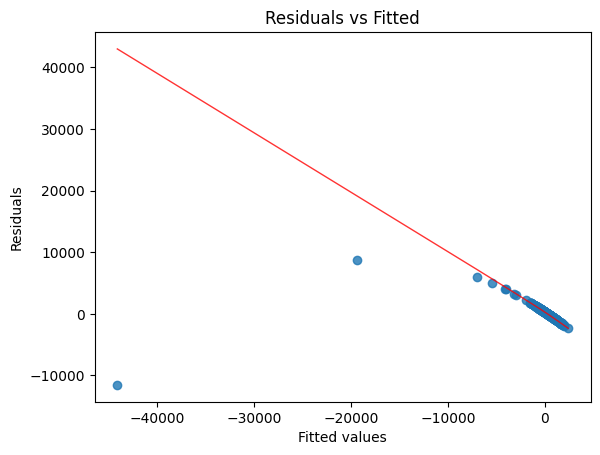

In [61]:
# a)
print(sm.stats.diagnostic.linear_reset(result, power=3, test_type='fitted'))

model_fitted_y = result.fittedvalues
model_residuals = result.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

a) Założenie liniowości formy funkcyjnej nie jest spełnione. Gdyby założenie było spełnione, widoczna byłaby chmura punktów, brak trendu i czerwona prosta byłaby horyzontalna.

Test RESET Ramseya potwierdza tę obserwację, dając zerowe pvalue pozwalające na odrzucenie hipotezy zerowej i przyjęcie hipotezy alternatywnej mówiącej, że nieliniowe kombinacje zmiennych objaśniających pomagają lepiej wytłumaczyć zmienną wydatki_zyw.

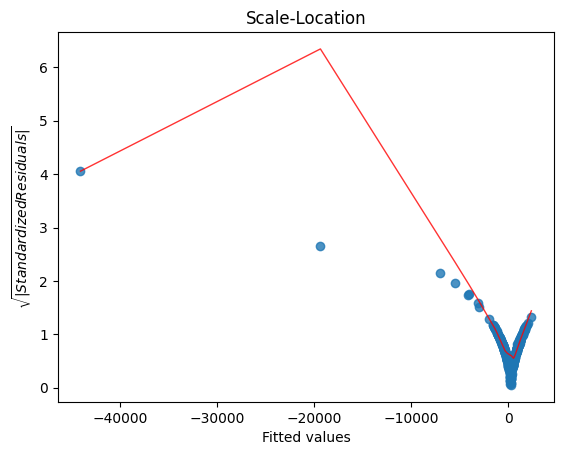

In [62]:
# b)
model_fitted_y = result.fittedvalues
model_norm_residuals = result.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

b) Założenie homoskedastyczności również nie jest spełnione.

Dane powinny tworzyć chmurę, natomiast widoczny kształt wskazuje na heteroskedastyczność oznaczającą, że odchylenie standardowe zmiennej `wydatki_zyw` nie jest stałe dla różnych wartości zmiennych objaśniających.

In [63]:
# c)
fig = px.line(y=result.resid)
fig.add_hline(y=0, line_color="black")
fig.update_layout(xaxis_title='observation', yaxis_title='residuals')
fig.show()

c) Założenie o braku autokorelacji **jest** spełnione. Mimo że około trzysetnej obserwacji wartości szybko rosną, a po chwili od razu maleją, a statystyka `Durbin-Watson: 1.447` z podsumowania modelu wskazuje na pozytywną autokorelację (zazwyczaj wartości w przedziale 1.5-2.5 są uznawane za akceptowalne. [Źródło](https://help.sap.com/doc/saphelp_scm700_ehp02/7.0.2/en-US/e8/3cc95360267614e10000000a174cb4/content.htm?no_cache=true)), to wiemy, że kolejność obserwacji nie ma żadnego znaczenia i kolejne obserwacje są od siebie niezależne, stąd problem z autokorelacją nie może występować.

ShapiroResult(statistic=0.7733725905418396, pvalue=2.0859709824804407e-20)


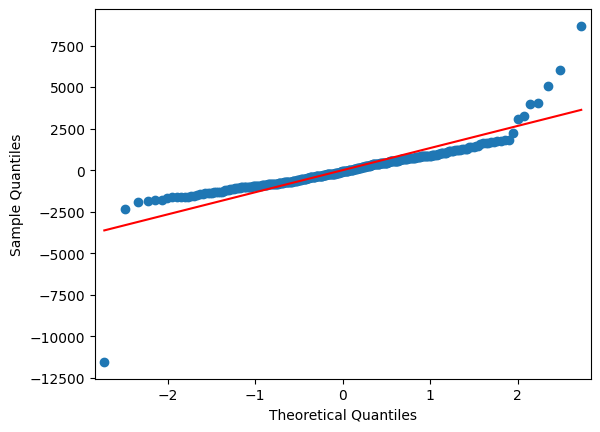

In [64]:
# d)
print(stats.shapiro(result.resid))
qqplot = qqplot(result.resid, line='s')
qqplot.show()


d) Założenie o normalnym rozkładzie składnika losowego nie jest spełnione. Na QQplot widać, że punkty często nie pokrywają się z czerwoną prostą.

Taki sam wniosek można wyciągnąć z testu Shapiro Wilka, którego wynikowe pvalue równe 2.08e-20 pozwala na odrzucenie hipotezy o normalnym rozkładzie.

Widać to również ze statystyki `Prob(Omnibus): 0.000`, która też pozwala na odrzucenie zakładanej hipotezy zerowej, że residua mają rozkład normalny.


• Sprawdź, czy we wstępnym modelu występuje problem niedokładnej współliniowości (multicollinearity )
(0,5pkt)

In [65]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_model.columns
vif_data["VIF"] = [variance_inflation_factor(data_model.values.astype(float), i) for i in range(len(data_model.columns))]

print(vif_data)

         feature          VIF
0          const  2290.436381
1           waga     1.728087
2         wzrost     2.212053
3         dzieci     1.036916
4           wiek     1.194964
5         dochod     3.946904
6   oszczednosci     6.467737
7         plec_2     2.601661
8      jednoos_1     2.379705
9      miejsce_2     1.491823
10     miejsce_3     1.484146


Na podstawie statystyki VIF, można powiedzieć, że występuje problem niedokładnej współliniowości.

Widać, że statystyka VIF jest wysoka dla oszczędności (6.47), ale zazwyczaj jako za duże wartości uważa się liczby większe lub równe 10.
Statystyka VIF jest bardzo wysoka dla const (2290), co oznacza współliniowość z innymi zmiennymi w modelu i dużą wariancję stałej.

• Korzystając z analizy obserwacji odstających dla wstępnego modelu, sprawdź, czy baza zawiera błędy.
Jeśli znajdziesz podejrzane obserwacje, zdecyduj i uzasadnij, co z nimi zrobisz. (1pkt)



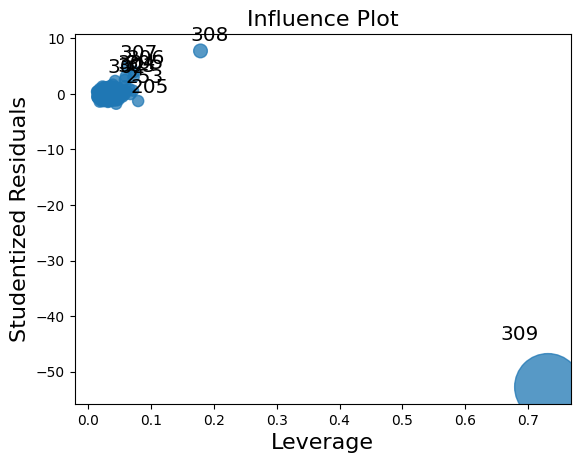

In [66]:
sm.graphics.influence_plot(result, criterion="cooks").show()

Na powyższym wykresie widać outliera.
Numer obserwacji (309) pokrywa się z numerem `id` osoby o największej ujemnej liczbie wydatków na żywność.
Duży rozmiar kropki wskazuje na istotny wpływ podczas stosowania metody najmniejszych kwadratów.

Na wykresach w poprzednich podpunktach również były widoczne bardzo odstające wartości. Można podejrzewać, że przynajmniej część z nich jest związana z niepoprawnymi danymi (ujemnymi wartościami wydatków na żywność), które udało nam się zaobserwować w zadaniu pierwszym.

Ponieważ błędne dane są powiązane z sześcioma osobami o największych dochodach w całym zbiorze danych, czyli osoby te reprezentują unikalny zbiór, to postanowiłem usunąć te rekordy, bo znalezienie zastępczych danych byłoby ciężkie.

Następnie ponownie stworzę model z nowymi danymi.

średni dochod: 1389.32, średnie oszczednosci 887.98, średnie wydatki na żywność 235.57

Dane posortowane po id (id w influence plot są o jeden mniejsze, bo zaczynają się od zera)
       dochod  oszczednosci  wydatki_zyw
id                                     
304  4780.15       3390.59       124.69
303  4339.20       2921.25       110.60
302  3893.04       3086.41       301.69
299  3808.50       3161.68       287.68
301  3751.99       2961.96       297.58
300  3632.65       2463.14       216.29
298  3467.62       2497.21       272.89
296  3289.24       2640.79       286.58
297  3243.21       2482.30       292.73
294  3173.45       2535.91       283.44


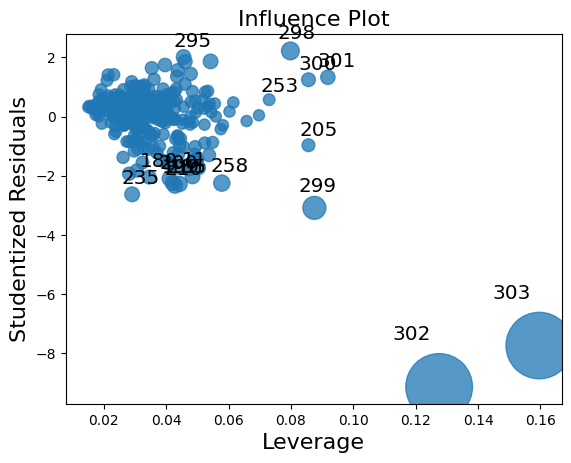

In [67]:
data_model = pd.read_csv("dane_projekt1.csv", sep=";", index_col='id').sort_values('id')
data_model = data_model[data_model['wydatki_zyw'] >= 0]
data_model.reset_index(drop=True, inplace=True)

Y = data_model['wydatki_zyw']
data_model = data_model.drop('wydatki_zyw', axis=1)

data_model = sm.add_constant(data_model)
data_model = pd.get_dummies(data_model, columns=['plec', 'jednoos', 'miejsce'], drop_first=True)

result = sm.OLS(Y, data_model.astype(float)).fit()
sm.graphics.influence_plot(result, criterion="cooks").show()

print(f"średni dochod: {np.mean(data['dochod']):.2f}, średnie oszczednosci {np.mean(data['oszczednosci']):.2f}, średnie wydatki na żywność {np.mean(data['wydatki_zyw']):.2f}")
print("\nDane posortowane po id (id w influence plot są o jeden mniejsze, bo zaczynają się od zera)\n", data[['dochod', 'oszczednosci', 'wydatki_zyw']].sort_values(by='dochod', ascending=False).head(10))

Na influence plot nadal widać punkty w prawym dolnym rogu (302 i 303), jednak te obserwacje można wytłumaczyć.
Odpowiadają one osobom o około czterokrotnie większych dochodach i oszczędnościach niż średnia, a jednocześnie wydatkach na żywność dwukrotnie poniżej średniej.

Nie modyfikuję i nie odrzucam tych danych, bo chociaż dosyć skrajne, wydają mi się możliwe. Jak się za chwilę okaże, model trenowany na danych ze wspomnianymi outlierami też może być bardzo dobry, więc tym bardziej nie chcę ich odrzucać.

In [68]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_model.columns
vif_data["VIF"] = [variance_inflation_factor(data_model.values.astype(float), i) for i in range(len(data_model.columns))]
print(vif_data)

         feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3         dzieci     1.028401
4           wiek     1.203732
5         dochod     9.216374
6   oszczednosci    11.222733
7         plec_2     2.625501
8      jednoos_1     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


Niestety okazuje się, że po usunięciu niepoprawnych danych statystyka VIF wzrosła i dla zmiennej `dochod` jest równa ponad 9, a dla zmiennej `oszczednosci` ponad 11. Odrzucenie zmiennej `dochod` z modelu powoduje, że VIF dla `oszczednosci` spada do około 2, co sugeruje, że to właśnie między tymi zmiennymi występuje zbyt silna współliniowość.


• Popraw model tak, aby spełniał jak najwięcej założeń KMRL. Opisz kroki podjęte do otrzymania
“najlepszego” modelu (4pkt).
Wskazówka: Rozważ różne formy funkcyjne oraz transformacje zmiennych.

In [69]:
data_model = pd.read_csv("dane_projekt1.csv", sep=";", index_col='id').sort_values('id')
data_model = data_model[data_model['wydatki_zyw'] >= 0]
data_model.reset_index(drop=True, inplace=True)

Y = data_model['wydatki_zyw']
data_model = data_model.drop('wydatki_zyw', axis=1)

data_model = pd.get_dummies(data_model, columns=['plec', 'jednoos', 'miejsce'], drop_first=True)

data_model = data_model.astype(float)


# Dodanie nowej zmiennej do modelu
x = data_model['dochod']
y = data_model['oszczednosci']
data_model['roznica_kwadratow'] = (x - y)**2
data_model['roznica'] = x - y
data_model = data_model.drop('dochod', axis=1)
data_model = data_model.drop('oszczednosci', axis=1)

data_model = sm.add_constant(data_model)
result = sm.OLS(Y, data_model).fit()

# usuwanie nieistotne zmienne z modelu dla alpha = 0.01
def usun_nieistotne(Y, data_model_copy, model_fitted):
    variables = list(data_model_copy.columns)

    while True:
        pvalues = model_fitted.pvalues
        variables_to_test = [v for v in variables if pvalues[v] > 0.01]  # bierzemy tylko te zmienne, które można wyrzucić

        if not variables_to_test:  # kończymy, jak już nie ma nic do odrzucenia
            break

        r2_values = {}  # słownik/mapa

        for var in variables_to_test:  # szukanie zmiennej, po której wyrzuceniu model jest najlepszy patrząc po R^2
            temp_variables = [v for v in variables if v != var]  # bierzemy wszystkie zmienne poza testowaną
            temp_model = sm.OLS(Y, data_model_copy[temp_variables])  # trenujemy tylko na wybranych kolumnach
            temp_results = temp_model.fit()
            r2_values[var] = temp_results.rsquared_adj

        worst_var = min(r2_values, key=r2_values.get)  # usunięcie najgorszej zmiennej
        variables.remove(worst_var)  # aktualizujemy listę zmiennych

        data_model_copy = data_model_copy[variables]  # przetrenowanie modelu na nowo
        data_model_copy = sm.add_constant(data_model_copy)
        model = sm.OLS(Y, data_model_copy)
        model_fitted = model.fit()

    return model_fitted  # wynikowy model

print("Przed usuwaniem nieistotnych zmiennych:\n", result.summary())
result = usun_nieistotne(Y, data_model, result)
print("\n\n\nPo usuwaniu nieistotnych zmiennych:\n", result.summary())


vif_data = pd.DataFrame()
vif_data["feature"] = data_model.columns
vif_data["VIF"] = [variance_inflation_factor(data_model.values.astype(float), i) for i in range(len(data_model.columns))]
print(vif_data)

Przed usuwaniem nieistotnych zmiennych:
                             OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.573e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:44:35   Log-Likelihood:                -447.96
No. Observations:                 304   AIC:                             917.9
Df Residuals:                     293   BIC:                             958.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Model poprawiłem stosując poniższe metody:
1. W celu zmniejszenia dużej współliniowości zmienne `dochod`, `oszczednosci` zastąpiłem jedną zmienną `roznica = dochod - oszczednosci`
2. Dodałem nową zmienną, której wartość jest równa $\text{roznica_kwadratow} = (\text{dochod} - \text{oszczednosci})^2$.

   Wysoką zależność tej zmiennej ze zmienną objaśnianą znalazłem korzystając z oprogramowania [TuringBot](https://turingbotsoftware.com), które podało mi wzór
   $\text{257.72284} - ((\text{oszczednosci} - (\text{dochod} / 1.011106)) \cdot (((\text{oszczednosci} + \sqrt{0.74491143}) - \text{dochod}) \cdot 193.48459))$, który ręcznie upraszczałem, aż dostałem finalną postać.

3. Wykorzystałem `backward feature selection method` do odrzucenia nieistotnych statystycznie zmiennych. \
 Metoda ta polega na wytrenowaniu modelu na wszystkich zmiennych i znalezieniu zmiennej z najwyższym pvalue
    - jeśli to pvalue jest większe niż $\alpha$ (w moim przypadku $\alpha = 1 \% $ to odrzucamy tą zmienną i powtarzamy cały proces od początku już bez tej zmiennej
    - jeśli pvalue jest mniejsze niż $\alpha$ to kończymy algorytm.

   Odrzucenie nieistotnie statystycznych zmiennych ma na celu zmniejszenie ryzyka przeuczenia i zmniejszenie wariancji modelu, bo mniej parametrów oznacza mniej sposobów "odpowiedzenia inaczej".

Mimo że zmienne mają różne rzędy wielkości (np. wiek i dochody), to nie rozważam skalowania, bo dopasowanie modelu (np. $R^2$ lub wartości zmiennych objaśnianych) nie zmieni się. Natomiast zmieni się skala współczynników w modelu, a tego chcę uniknąć, bo w następnym podpunkcie należy je interpretować.

Krótkie porównanie modelu przed i po odrzuceniu nieistotnych zmiennych pokazuje poprawę.
Nieznacznie wzrosła statystyka `Prob(Omnibus)`, natomiast `AIC` i `BIC` zmalały (co nie dziwi, bo uwzględniają one złożoność modelu).

Po $R^2=1$ widać, że predykcje idealnie pasują do danych, ale nie ma ryzyka overfittingu, bo model ma za mało zmiennych. Widać to też po `Adj. R-squared: 1.000`, które uwzględnia liczbę zmiennych.

W nowym modelu statystyka VIF jest duża (w przypadku zmiennych `roznia_kwadratow` i `roznica` jest to normalne i spodziewane).
Bardzo wysoka wartość VIF dla stałej równa 2300 oznacza, że jest ona zależna od zmiennych, co powoduje, że jej wariancja i błąd standardowy są większe. Nie będę interpretował stałej, więc nie jest to problem.




Teraz sprawdzę, czy poprawiony model spełnia założenia Klasycznego Modelu Regresji Liniowej (KMRL).

Text(0, 0.5, 'Residuals')

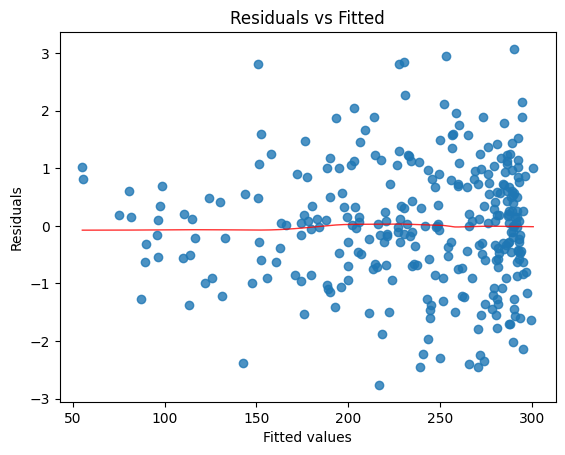

In [70]:
# a)
model_fitted_y = result.fittedvalues
model_residuals = result.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

a) Założenie liniowości formy funkcyjnej jest spełnione. Widoczna jest chmura punktów, nie ma trendu i czerwona prosta jest horyzontalna.


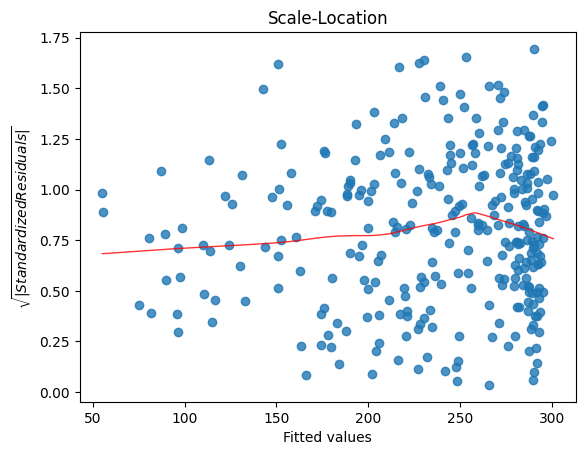

In [71]:
# b)
model_fitted_y = result.fittedvalues
model_norm_residuals = result.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

b) Założenie homoskedastyczności jest spełnione. Ponownie widoczna jest chmura punktów, nie ma trendu i czerwona prosta jest (w miarę) horyzontalna.

ShapiroResult(statistic=0.9954207539558411, pvalue=0.5121395587921143)


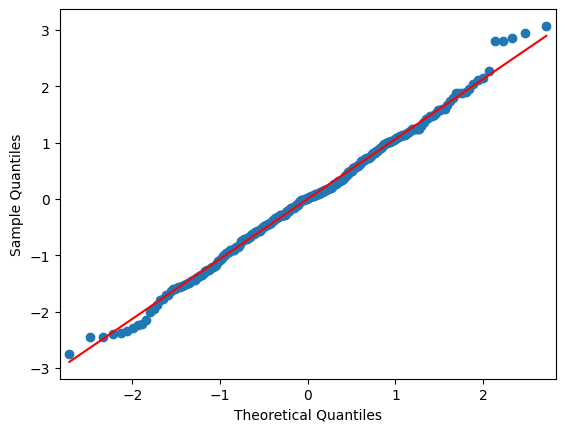

In [72]:
# c)
print(stats.shapiro(result.resid))
from statsmodels.graphics.gofplots import qqplot
qqplot = qqplot(result.resid, line='s')
qqplot.show()

c) Patrząc na pvalue z testu Shapiro Wilka, nie ma podstaw do odrzucenia hipotezy o normalnym rozkładzie składnika losowego dla $\alpha=1 \% $

Na QQplot punkty prawie zawsze pokrywają się z czerwoną prostą, co również sugeruje normalny rozkład.

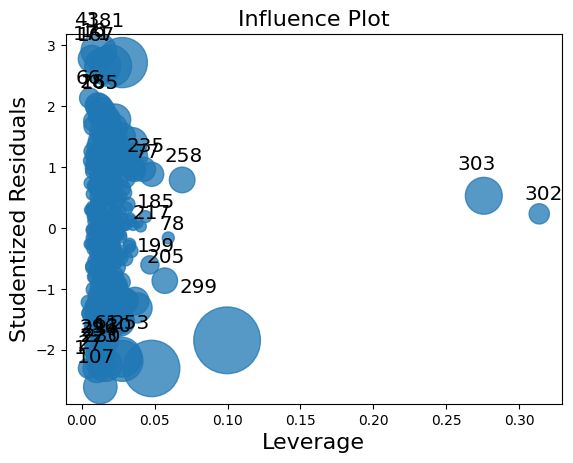

In [73]:
sm.graphics.influence_plot(result, criterion="cooks").show()

Tutaj również widać znaczącą przewagę nowego modelu nad starym. Nie ma punktów, których usunięcie spowodowałoby bardzo duże zmiany w modelu [(influential vs leverage)](https://online.stat.psu.edu/stat462/node/170/).


• Przedstaw ilościową interpretację wybranych dwóch indywidualnie istotnych współczynników w “najlepszym” modelu. Pamiętaj, że stałej nie interpretuje się. Zalecany wybór zmiennych niepoddanych
transformacji. (1pkt)

In [74]:
print("Średnie wydatki na żywność: ", np.mean(data['wydatki_zyw']), "\n\n")
print(result.summary())

Średnie wydatki na żywność:  235.57115131578948 


                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.717e+05
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:44:39   Log-Likelihood:                -450.29
No. Observations:                 304   AIC:                             912.6
Df Residuals:                     298   BIC:                             934.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

1) Współczynnik przy zmiennej waga to około 0.36, co oznacza, że zwiększenie wagi o 1 kg spowoduje, że wydatki na żywność przewidziane przez model wzrosną o 0.36 bajtalara. To, że cięższa osoba wydaje więcej jest normalne, chociaż wpływ tej zmiennej jest mniejszy, niż się spodziewałem, bo osoba cięższa o 50 kg wyda zaledwie 18 bajtalarów więcej, gdzie średnia wydatków na żywność to 236.


2) Współczynnik przy zmiennej dzieci to około 1.5. Oznacza to, że zwiększenie liczby dzieci o jedno spowoduje, że wydatki na żywność przewidziane przez model wzrosną o 1.5 bajtalara. Ponownie to, że wydatki na żywność rosną wraz ze wzrostem liczby utrzymywanych dzieci wydaje się normalne, ale tak jak wcześniej, wartość ta wydaje się niska. Zaledwie 1.5 bajtalara na wyżywienie dziecka to niewiele (nawet 3 bajtalary to mało biorąc pod uwagę, że badana osoba może dzielić wydatki na pół ze swoim małżonkiem).


• Jakie są opisowe charakterystyki osób, które cechują wydatki na żywność należące do górnych 10%
predykcji wydatków na żywność w Państwa “najlepszym” modelu? Sprawdź i przedyskutuj (2pkt).


In [75]:
data_model = pd.read_csv("dane_projekt1.csv", sep=";", index_col='id').sort_values('id')
data_model = data_model[data_model['wydatki_zyw'] >= 0]

data_model['fitted_value'] = result.fittedvalues

data_model.sort_values(by='fitted_value', ascending=False, inplace=True)
top10 = data_model.head(int(np.ceil(len(data_model) * 0.1))) # górne 10% predykcji

top10_desc = top10.describe()
full_data = data_model.describe()

df = pd.DataFrame()

for stat in top10_desc.index:
    for col in top10_desc.columns:
        if col not in ['wydatki_zyw', 'fitted_value']:
            df.at[stat, f"{col}_top 10%"] = round(top10_desc.at[stat, col],2)
            df.at[stat, f'{col}_cała_próbka'] = round(full_data.at[stat, col], 2)


men_women_top10 = top10.groupby('plec').size()
men_women_full = data_model.groupby('plec').size()
print("Procent kobiet w górnych 10%", men_women_top10[1]/(men_women_top10[1]+men_women_top10[2])*100)
print("Procent kobiet w całej próbce", men_women_full[1]/(men_women_full[1]+men_women_full[2])*100)

household_top10 = top10.groupby('jednoos').size()
household_full = data_model.groupby('jednoos').size()
print("\nProcent gospodarstw wieloosobowych w górnych 10%", household_top10[0]/(household_top10[0]+household_top10[1])*100)
print("Procent gospodarstw wieloosobowych w całej próbce", household_full[0]/(household_full[0]+household_full[1])*100)

city_top10 = top10.groupby('miejsce').size()
city_full = data_model.groupby('miejsce').size()
print("\nMiejsce zamieszkania górnych 10%", city_top10)
print("Miejsce zamieszkania w całej próbce", city_full)

print("\n\n", df)

Procent kobiet w górnych 10% 61.29032258064516
Procent kobiet w całej próbce 53.61842105263158

Procent gospodarstw wieloosobowych w górnych 10% 67.74193548387096
Procent gospodarstw wieloosobowych w całej próbce 58.223684210526315

Miejsce zamieszkania górnych 10% miejsce
1    11
2    13
3     7
dtype: int64
Miejsce zamieszkania w całej próbce miejsce
1     83
2    138
3     83
dtype: int64


        waga_top 10%  waga_cała_próbka  wzrost_top 10%  wzrost_cała_próbka  \
count         31.00            304.00           31.00              304.00   
mean          78.85             79.82          172.74              172.81   
std            2.93              3.30            6.32                6.94   
min           73.18             68.89          162.35              155.67   
25%           77.28             77.42          167.57              167.13   
50%           78.48             79.90          172.34              172.89   
75%           80.71             82.14          176.72          

#### Porównanie górnych dziesięciu procent z całą populacją

- **waga**: różnica średniej wagi to 1 kg i o dziwo to górne 10% osób wydających najwięcej na żywność ma średnio mniejszą wagę.
- **wzrost**: średni wzrost jest prawie identyczny.
- **płeć**: w całej próbce kobiety stanowią 53.6%, natomiast w górnych dziesięciu procentach, aż 61.2% to kobiety.
- **dzieci**: średnia liczba dzieci jest prawie identyczna, ale górne 10% wydających najwięcej na żywność ma ich średnio minimalnie mniej, co nie jest intuicyjne.
- **wiek**: nie widać wyraźnych różnic w wieku.
- **dochód**: średni dochód górnych 10% jest większy o 164 bajtalary
- **oszczędności**: średnie oszczędności górnych 10% są większe o 142 bajtalary
- **jednoos**: w górnych 10% więcej osób mieszka w gospodarstwach wieloosobowych. W całej próbce było to 58.2%, a w górnych dziesięciu procentach jest to aż 67.7%
- **miejsce**: w górnych 10% osoby częściej mieszkają w miejscowościach o rozmiarze 1 niż 2 lub 3 (kolejno 35.4%, 41.9%, 22.5% mieszka w miejscowości o podanym rozmiarze, a dla całej populacji jest to kolejno 27.3%, 45%, 27,3%).

W powyższych rezultatach zaskakuje brak istotnej różnicy w wadze, wzroście i w liczbie utrzymywanych dzieci, w stosunku do całej populacji, bo intuicyjnie te czynniki powinny mieć duży wpływ na wydatki na żywność.\
To, że ludzie wydają więcej w mniejszych miejscowościach można wytłumaczyć mniejszą liczbą dużych marketów, w których cenny często są niższe.\
W gospodarstwach wieloosobowych to [kobiety częściej robią zakupy spożywcze](https://www.pewresearch.org/short-reads/2019/09/24/among-u-s-couples-women-do-more-cooking-and-grocery-shopping-than-men/), stąd nie dziwi, że ich udział w górnych dziesięciu procentach to aż 67,6%.
Nie dziwi również to, że ludzie o większych dochodach mogą wydać więcej (i jednocześnie mieć większe oszczędności).